**Problem definition**

Problem description:

The primary objective here is to predict which passengers survived the sinking of the Titanic based on their personal characteristics and trip information. The goal is to build a predictive model that, given a set of features about each passenger, can classify whether the passenger survived or not.

Context: The Titanic, one of the largest and most luxurious ships of its time, sank in 1912 after hitting an iceberg. Based on the available data about the passengers, such as age, gender, social class, and other features, we aim to create a model that can predict the likelihood of survival.

Goal: Train a predictive model using the provided data in train.csv, where the survival status of each passenger is known. Once the model is trained, it will be used to predict the survival of passengers in test.csv, where the survival status is unknown. The final objective is to accurately predict which passengers in the test set survived based on their characteristics.


 Is This a Supervised or Unsupervised Learning Problem ?

 This is a supervised learning problem. We have labeled data, meaning that for each passenger in the training set, we know whether they survived or not. Our objective is to train a model that learns the relationship between the features (age, gender, class, etc.) and the label (survived or not) so it can make predictions on new data.

Input (features): Passenger attributes (e.g., age, gender, class, etc.).

Output (label): A binary variable indicating whether the passenger survived (0 = Did not survive, 1 = Survived).

Assumptions of the problem:

Age: It's expected that elderly passengers had a lower chance of survival compared to adults.

Gender: It is likely that women had a higher survival rate due to the "women and children first" policy for the lifeboats.

Economic Class (Pclass): Passengers in higher classes may have had a higher chance of survival due to quicker access to lifeboats and better accommodations.

Family Size: Passengers traveling with large families may have had lower chances of survival, given the difficulty of coordinating larger groups in an emergency.


Constraints or Conditions Imposed on Data Selection:


Completeness of Data: The original Titanic dataset contains many missing values, such as age and cabin data. These missing values must be handled either through imputation techniques or by dropping irrelevant columns.

Dataset Size: The number of observations is limited (891 passengers in the training set and 418 in the test set), which may constrain the performance of more complex machine learning algorithms.

Definition of Each Dataset Attribute

Below is a detailed explanation of each of the key attributes (features) in the Titanic dataset:

PassengerId: A unique identifier for each passenger.

Survived: The target variable, indicating whether the passenger survived (1) or not (0).

Pclass: Passenger's ticket class (1st = upper class, 2nd = middle class, 3rd = lower class).

Name: The full name of the passenger.

Sex: The gender of the passenger (male or female).

Age: The age of the passenger in years.

SibSp: Number of siblings or spouses aboard the Titanic.

Parch: Number of parents or children aboard the Titanic.

Ticket: The ticket number of the passenger.

Fare: The fare paid for the ticket.

Cabin: The cabin number assigned to the passenger.

Embarked: The port of embarkation where the passenger boarded the ship (C = Cherbourg, Q = Queenstown, S = Southampton).

**Data pre-processing**

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score



In [2]:
tf.__version__

'2.17.0'

Importing the dataset

The dataset was directed downloaded from Titanic - Machine Learning from Disaster: https://www.kaggle.com/competitions/titanic/data


In [3]:
dataset = pd.read_csv('train.csv')

In [4]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Checking assumptions

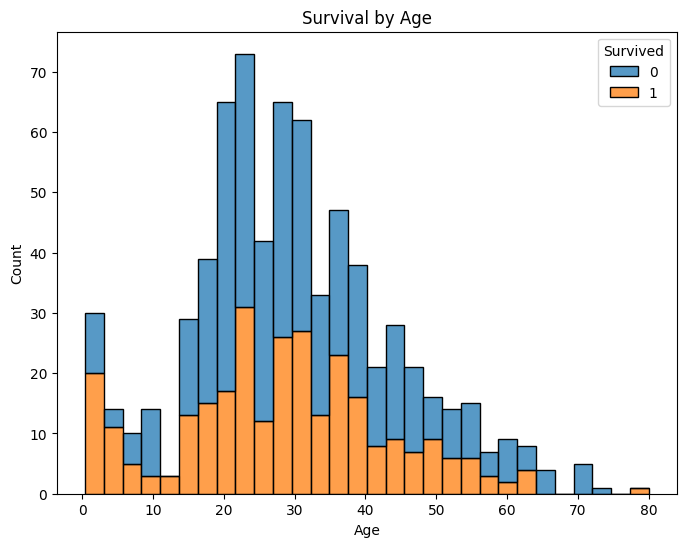

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


In [5]:
# Assumption 1: Impact of Age on Survival
plt.figure(figsize=(8,6))
sns.histplot(data=dataset, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Survival by Age')
plt.show()

# Average age of survivors vs non-survivors
print(dataset.groupby('Survived')['Age'].mean())

Young children (ages between 0-10) show a relatively higher survival rate, which aligns with the assumption that children were prioritized during evacuation.

Adults in the range of 20-40 years old have a lower survival rate compared to children, but there are survivors and non-survivors in this age range.

Elderly passengers (above 60) appear to have a much lower chance of survival. Therefore, assumption 1 is true.

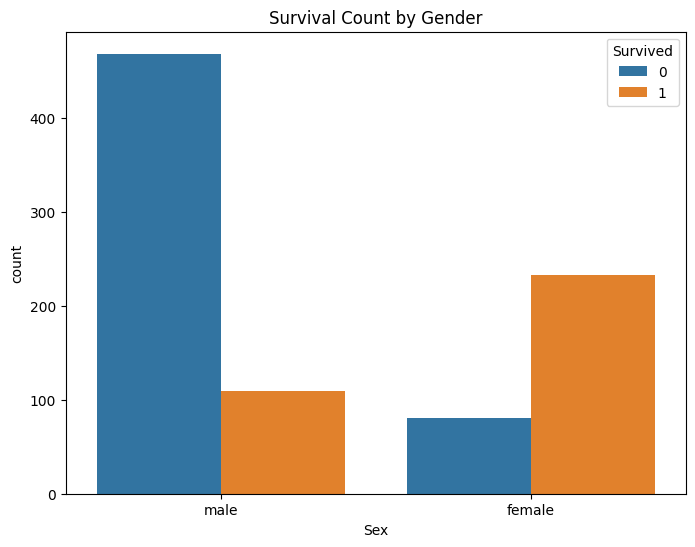

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [6]:
# Assumption 2: Impact of Gender on Survival
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', hue='Survived', data=dataset)
plt.title('Survival Count by Gender')
plt.show()

# Percentage of survival by gender
print(dataset.groupby('Sex')['Survived'].mean())

Women had a much higher survival rate compared to men. The majority of women on board survived. Men, on the other hand, had a notably lower survival rate, with the majority not surviving. Therefore, assumption 2 is true.


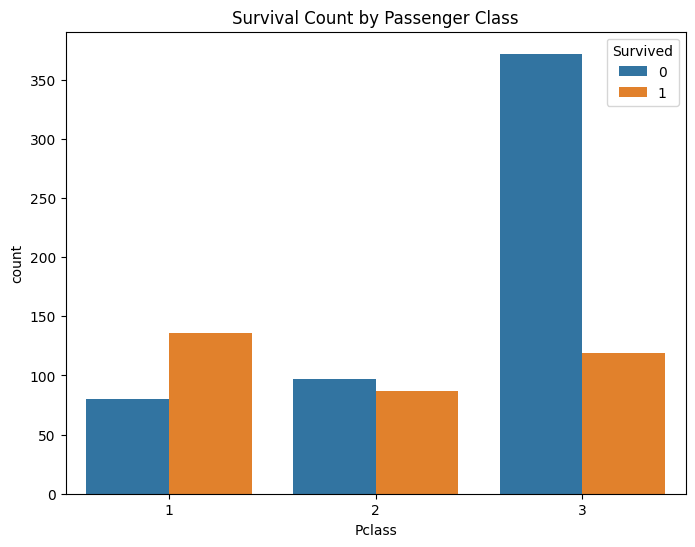

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [7]:
# Assumption 3: Impact of Passenger Class on Survival
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass', hue='Survived', data=dataset)
plt.title('Survival Count by Passenger Class')
plt.show()

# Percentage of survival by passenger class
print(dataset.groupby('Pclass')['Survived'].mean())

The count plot showing survival by passenger class (Pclass) indicates that passengers in first class (Pclass = 1) had the highest survival rate. This suggests that higher socioeconomic status was associated with better access to lifeboats.

Third-class passengers (Pclass = 3) had the lowest survival rate, reinforcing the idea that passengers with lower socioeconomic status faced more difficulties during evacuation. Therefore, assumption 3 is true.


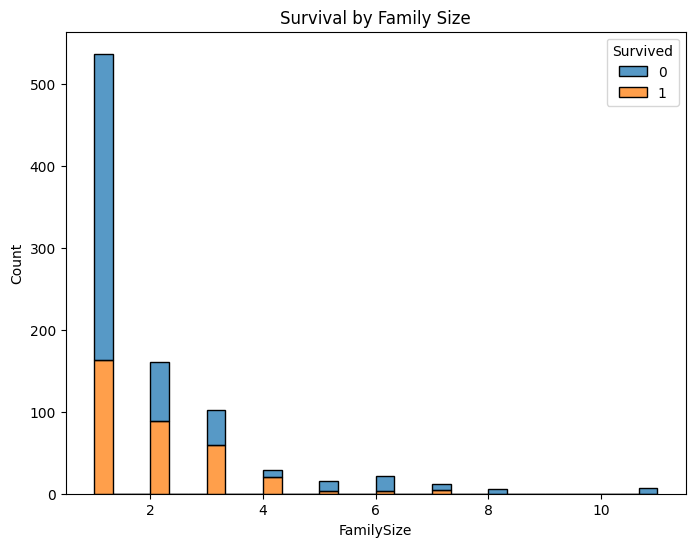

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


In [8]:
# Assumption 4: Impact of Family Size on Survival
# Create a new feature: family size (SibSp + Parch + 1, because the passenger is also part of the family)
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

plt.figure(figsize=(8,6))
sns.histplot(data=dataset, x='FamilySize', hue='Survived', multiple='stack', bins=30)
plt.title('Survival by Family Size')
plt.show()

# Percentage of survival by family size
print(dataset.groupby('FamilySize')['Survived'].mean())

By creating the new FamilySize feature (the total number of family members aboard), we can observe how traveling with family affected survival:

The histogram shows that passengers traveling alone (FamilySize = 1) had a lower survival rate.
Small families (FamilySize = 2 or 3) seem to have had better survival chances, potentially because small groups were easier to evacuate.

Larger families (FamilySize > 4) show a declining trend in survival, possibly due to the challenges of coordinating larger groups in an emergency. Therefore, assumption 4 is true. However, now we also know that passegengers traveling alone had lower survival rates.

Numerical attributes statistics

In [9]:
# Select numeric columns
numeric_columns = dataset.select_dtypes(include=['float64', 'int64'])

# Summary statistics for numeric columns
summary_stats = numeric_columns.describe().T

# Calculate additional statistics (median, mode, missing values)
summary_stats['median'] = numeric_columns.median()
summary_stats['mode'] = numeric_columns.mode().iloc[0]
summary_stats['missing_values'] = numeric_columns.isnull().sum()

# Adding standard deviation
summary_stats['std_dev'] = numeric_columns.std()

# Display the summary statistics
print(summary_stats)


             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   
FamilySize   891.0    1.904602    1.613459  1.00    1.0000    1.0000    2.0   

                  max    median   mode  missing_values     std_dev  
PassengerId  891.0000  446.0000   1.00               0  257.353842  
Survived       1.0000    0.0000   0.00               0    0.486592  
Pclass         3.0000    3.0000   3.00               0    0.836071  
Age         

The average survival rate is 0.3838, which means approximately 38% of the passengers survived.

The mean value for Pclass of 2.31 shows that most passengers were in second or third class.

The average age is 29.7, indicating that most passengers were in their late 20s. The median age is 28, very close to the mean, showing a fairly balanced age distribution. There are 177 missing values, which is significant and will need to be addressed.

The average fare is 32.20, but the wide range of values means that the average may not be a good representation of most passengers. The median fare is 14.45, much lower than the mean, suggesting that there are some very high fare values (outliers) that are skewing the mean upward.

The average family size (including the passenger) is 1.90, indicating that most passengers were traveling either alone or with a small family.

Handling missing data

Age missing data is replaced by the median to avoid outliers.

There are only 2 out of 891 missing data for Embarked. The data will be replaced by the most frequent value.

77% of the Cabin data are missing. Therefore this type of data will be removed.

In [10]:
# Verifying nulls in the dataset
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
# Replace missing Age data by the median
age_imputer = SimpleImputer(strategy='median')
dataset['Age'] = age_imputer.fit_transform(dataset[['Age']])

In [12]:
# Replace missing Embarked data by the most frequent
embarked_imputer = SimpleImputer(strategy='most_frequent')
dataset['Embarked'] = embarked_imputer.fit_transform(dataset[['Embarked']]).ravel()

In [13]:
# Remove all the cabin data
dataset = dataset.drop(columns=['Cabin'])

# Remove SibSp and Parch data since now there is FamilySize column
dataset = dataset.drop(columns=['SibSp', 'Parch'])

In [14]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,W./C. 6607,23.4500,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C,1


In [15]:
# Verifying nulls in the dataset
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
Ticket,0
Fare,0
Embarked,0
FamilySize,0


For the purpose of this job, the information provided on the columns Name, Ticket and Passenger ID have no influence on the survival status of each person. Therefore, this data will be ruled out.

In [16]:
dataset = dataset.drop(columns=['Name', 'Ticket', 'PassengerId'])

As mentioned before, Fare values are highly skewed, applying a logarithmic transformation can reduce the impact of outliers and create a more normalized distribution.


In [17]:
# Applying log transformation to Fare (adding 1 to avoid log(0) errors)
dataset['Fare'] = np.log1p(dataset['Fare'])

In [18]:
dataset

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,2.110213,S,2
1,1,1,female,38.0,4.280593,C,2
2,1,3,female,26.0,2.188856,S,1
3,1,1,female,35.0,3.990834,S,2
4,0,3,male,35.0,2.202765,S,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,2.639057,S,1
887,1,1,female,19.0,3.433987,S,1
888,0,3,female,28.0,3.196630,S,4
889,1,1,male,26.0,3.433987,C,1


In [19]:
# Matrix of features
X = dataset.iloc[:, 1:].values
# Target vector
y = dataset.iloc[:, 0].values

In [20]:
X

array([[3, 'male', 22.0, 2.1102132003465894, 'S', 2],
       [1, 'female', 38.0, 4.2805931204649, 'C', 2],
       [3, 'female', 26.0, 2.188856327665703, 'S', 1],
       ...,
       [3, 'female', 28.0, 3.196630215920881, 'S', 4],
       [1, 'male', 26.0, 3.4339872044851463, 'C', 1],
       [3, 'male', 32.0, 2.169053700369523, 'Q', 1]], dtype=object)

In [21]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

Encoding categorical data

In [22]:
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])

One hot encoding Embarked data

In [23]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [24]:
X

array([[0.0, 0.0, 1.0, ..., 22.0, 2.1102132003465894, 2],
       [1.0, 0.0, 0.0, ..., 38.0, 4.2805931204649, 2],
       [0.0, 0.0, 1.0, ..., 26.0, 2.188856327665703, 1],
       ...,
       [0.0, 0.0, 1.0, ..., 28.0, 3.196630215920881, 4],
       [1.0, 0.0, 0.0, ..., 26.0, 3.4339872044851463, 1],
       [0.0, 1.0, 0.0, ..., 32.0, 2.169053700369523, 1]], dtype=object)

Sppliting the dataset into the training set and test set

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

Feature Scaling

In [26]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
X_train

array([[-0.48591266, -0.30610782,  0.61848547, ..., -2.10398883,
        -0.55629667,  0.05684599],
       [-0.48591266,  3.26682279, -1.61685287, ..., -0.0830504 ,
        -0.17968822, -0.57556563],
       [ 2.05798302, -0.30610782, -1.61685287, ...,  0.77196202,
         1.50479533,  0.68925761],
       ...,
       [ 2.05798302, -0.30610782, -1.61685287, ...,  0.07240641,
         1.75714997, -0.57556563],
       [-0.48591266,  3.26682279, -1.61685287, ..., -0.0830504 ,
        -0.83546277, -0.57556563],
       [-0.48591266, -0.30610782,  0.61848547, ..., -0.86033441,
        -0.82322389,  0.68925761]])

In [28]:
X_test

array([[-0.48591266, -0.30610782,  0.61848547, ..., -0.70487761,
        -0.73290671, -0.57556563],
       [-0.48591266, -0.30610782,  0.61848547, ..., -0.6271492 ,
        -0.4667163 ,  0.05684599],
       [-0.48591266, -0.30610782,  0.61848547, ...,  0.77196202,
        -0.81498993, -0.57556563],
       ...,
       [-0.48591266, -0.30610782,  0.61848547, ..., -0.0830504 ,
        -0.24432455, -0.57556563],
       [-0.48591266,  3.26682279, -1.61685287, ..., -0.0830504 ,
        -0.93458963, -0.57556563],
       [ 2.05798302, -0.30610782, -1.61685287, ..., -0.0830504 ,
         0.24989019,  0.05684599]])

**Building and training the classification models**

In [29]:
classifier_RF = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 7)
classifier_SVC = SVC(kernel = 'rbf', random_state = 0)
classifier_NB = GaussianNB()

In [30]:
classifier_RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=7)

In [31]:
classifier_SVC.fit(X_train, y_train)

SVC(random_state=0)

In [32]:
classifier_NB.fit(X_train, y_train)

GaussianNB()

**Making predictions and evaluating the models**

Predcting test set results

In [33]:
y_pred_RF = classifier_RF.predict(X_test)
y_pred_SVC = classifier_SVC.predict(X_test)
y_pred_NB = classifier_NB.predict(X_test)

Confusion matrix and accuracy score

In [34]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
cm_SVC = confusion_matrix(y_test, y_pred_SVC)
cm_NB = confusion_matrix(y_test, y_pred_NB)

In [35]:
cm_RF

array([[93, 17],
       [23, 46]])

In [36]:
cm_SVC

array([[96, 14],
       [28, 41]])

In [37]:
cm_NB

array([[90, 20],
       [22, 47]])

In [38]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
accuracy_score_SVC = accuracy_score(y_test, y_pred_SVC)
accuracy_score_NB = accuracy_score(y_test, y_pred_NB)

In [39]:
accuracy_score_RF

0.776536312849162

In [40]:
accuracy_score_SVC

0.7653631284916201

In [41]:
accuracy_score_NB

0.7653631284916201

Since the models did not displayed major changes in accuracy, we can select any of them. I opted for the Random Forest model.

**Hyperparameter tuning with grid search**

In [42]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=7),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best accuracy score
print("Best accuracy found: ", grid_search.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best accuracy found:  0.8469713385206343


In [43]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [44]:
# Save the best model
joblib.dump(grid_search.best_estimator_, 'best_random_forest_model.pkl')

# Load the saved model
loaded_model = joblib.load('best_random_forest_model.pkl')

**Import new data**

In [45]:
# Load the new dataset from a CSV file
dataset_new = pd.read_csv('test.csv')

# Create a new feature: family size (SibSp + Parch + 1, because the passenger is also part of the family)
dataset_new['FamilySize'] = dataset_new['SibSp'] + dataset_new['Parch'] + 1

# Applying log transformation to Fare (adding 1 to avoid log(0) errors)
dataset_new['Fare'] = np.log1p(dataset_new['Fare'])

In [46]:
dataset_new

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,2.178064,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,2.079442,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,2.369075,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,2.268252,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,2.586824,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,2.202765,NaN,S,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,4.699571,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,2.110213,NaN,S,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,2.202765,NaN,S,1


Handling missing data on the new dataset

In [47]:
age_imputer = SimpleImputer(strategy='median')
dataset_new['Age'] = age_imputer.fit_transform(dataset_new[['Age']])
dataset_new['Fare'] = age_imputer.fit_transform(dataset_new[['Fare']])

embarked_imputer = SimpleImputer(strategy='most_frequent')
dataset_new['Embarked'] = embarked_imputer.fit_transform(dataset_new[['Embarked']]).ravel()

results = dataset_new[['Name']].copy()

dataset_new = dataset_new.drop(columns=['Name', 'Ticket', 'PassengerId', 'Cabin', 'SibSp', 'Parch'])

In [48]:
# Verifying nulls in the dataset
dataset_new.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
Fare,0
Embarked,0
FamilySize,0


In [49]:
dataset_new

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,male,34.5,2.178064,Q,1
1,3,female,47.0,2.079442,S,2
2,2,male,62.0,2.369075,Q,1
3,3,male,27.0,2.268252,S,1
4,3,female,22.0,2.586824,S,3
...,...,...,...,...,...,...
413,3,male,27.0,2.202765,S,1
414,1,female,39.0,4.699571,C,1
415,3,male,38.5,2.110213,S,1
416,3,male,27.0,2.202765,S,1


In [50]:
# Matrix of features for the new data
X_new = dataset_new.iloc[:, :].values

# Label encoder
X_new[:, 1] = le.fit_transform(X_new[:, 1])

# One hot enconding
X_new = np.array(ct.fit_transform(X_new))

In [51]:
# Feature scaling
X_new = sc.fit_transform(X_new)

In [52]:
X_new

array([[-0.56814154,  2.84375747, -1.35067551, ...,  0.38623105,
        -0.86703096, -0.5534426 ],
       [-0.56814154, -0.35164743,  0.74037028, ...,  1.37137004,
        -0.96914881,  0.10564289],
       [-0.56814154,  2.84375747, -1.35067551, ...,  2.55353683,
        -0.66925153, -0.5534426 ],
       ...,
       [-0.56814154, -0.35164743,  0.74037028, ...,  0.70147553,
        -0.93728667, -0.5534426 ],
       [-0.56814154, -0.35164743,  0.74037028, ..., -0.20485235,
        -0.84145528, -0.5534426 ],
       [ 1.76012477, -0.35164743, -1.35067551, ..., -0.20485235,
         0.1403341 ,  0.76472838]])

**Make predictions for the new data**

In [53]:
y_pred_new = loaded_model.predict(X_new)

y_pred_new = y_pred_new.reshape(len(y_pred_new),1)

In [54]:
survival_prediction = strs = ["" for x in range(len(y_pred_new))]

for i in range (len(y_pred_new)):
    if y_pred_new[i] == 0:
        survival_prediction[i] = 'No'
    else:
        survival_prediction[i] = 'Yes'

In [55]:
results['Survival'] = survival_prediction

In [56]:
# Display list of survival prediction
results

,Name,Survival
0,"Kelly, Mr. James",No
1,"Wilkes, Mrs. James (Ellen Needs)",No
2,"Myles, Mr. Thomas Francis",No
3,"Wirz, Mr. Albert",No
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Yes
...,...,...
413,"Spector, Mr. Woolf",No
414,"Oliva y Ocana, Dona. Fermina",Yes
415,"Saether, Mr. Simon Sivertsen",No
416,"Ware, Mr. Frederick",No
